In [7]:
!pip install plotly pandas numpy wordcloud matplotlib

  Using cached wordcloud-1.9.4-cp311-cp311-win_amd64.whl (299 kB)



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


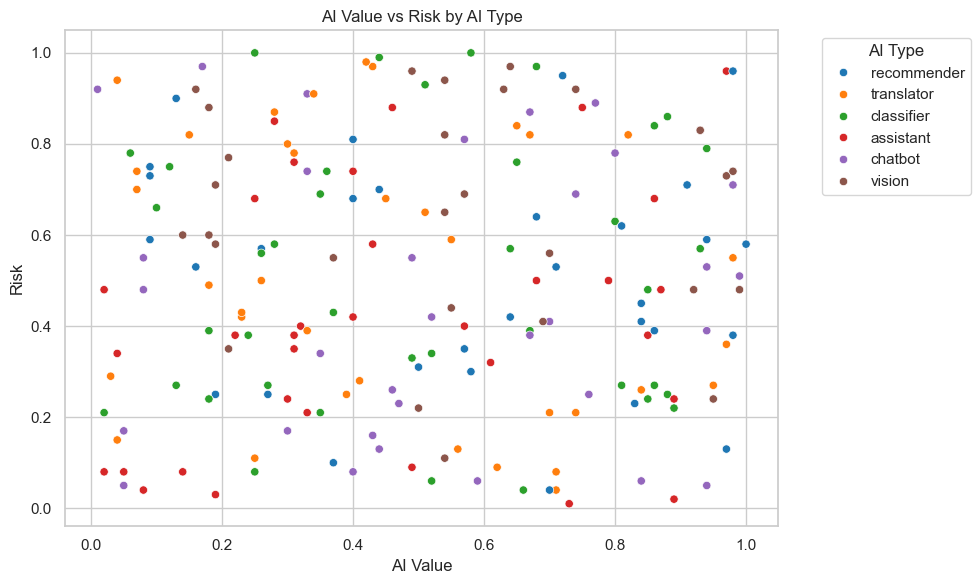

C:\Users\Pierre\AppData\Local\Temp\ipykernel_27120\196095135.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="ai_type", palette="Set2")


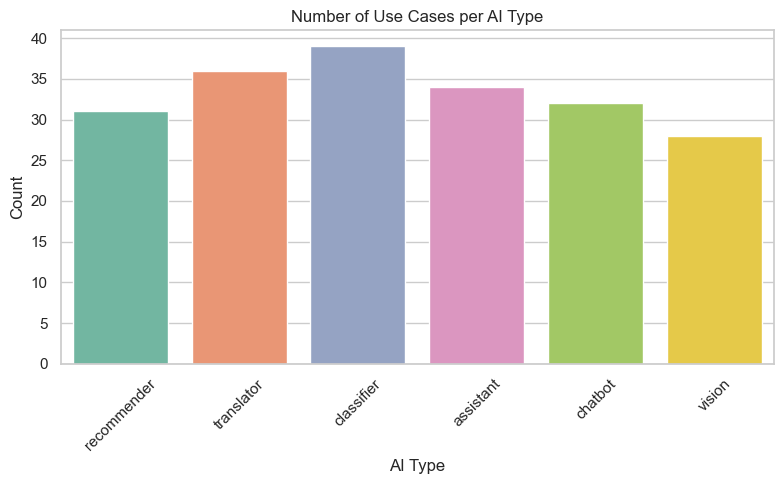

C:\Users\Pierre\AppData\Local\Temp\ipykernel_27120\196095135.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ai_type", y="risk", palette="Set3")


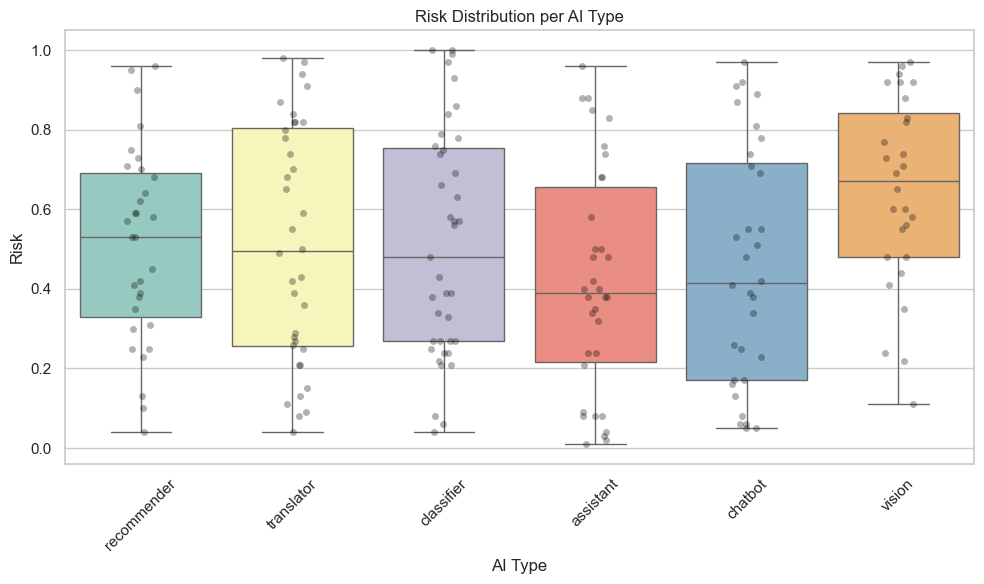

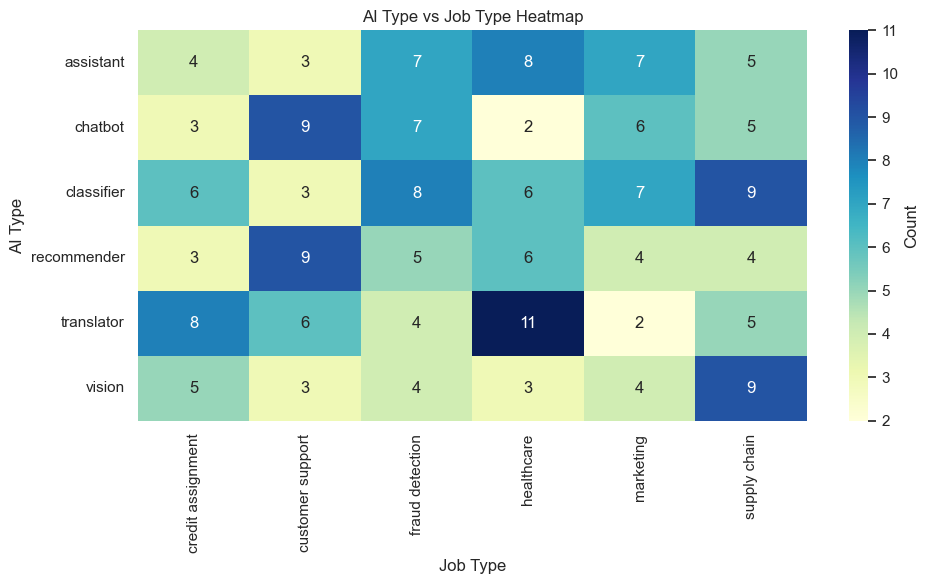

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# === Generate synthetic use case data ===
ai_types = ['chatbot', 'translator', 'assistant', 'recommender', 'vision', 'classifier']
job_types = ['fraud detection', 'credit assignment', 'customer support', 'marketing', 'healthcare', 'supply chain']
teams = [f'Team {chr(i)}' for i in range(65, 75)]  # Team A to Team J

num_samples = 200
data = {
    "id": range(1, num_samples + 1),
    "team": np.random.choice(teams, num_samples),
    "description": [f"Use case {i}" for i in range(1, num_samples + 1)],
    "ai_value": np.round(np.random.uniform(0, 1, num_samples), 2),
    "risk": np.round(np.random.uniform(0, 1, num_samples), 2),
    "ai_type": np.random.choice(ai_types, num_samples),
    "job_type": np.random.choice(job_types, num_samples),
}
df = pd.DataFrame(data)

# === Prepare for visualization ===
sns.set(style="whitegrid")

# === 1. Scatter Plot: AI Value vs Risk by AI Type ===
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="ai_value", y="risk", hue="ai_type", palette="tab10")
plt.title("AI Value vs Risk by AI Type")
plt.xlabel("AI Value")
plt.ylabel("Risk")
plt.legend(title="AI Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# === 2. Bar Chart: Number of Use Cases per AI Type ===
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="ai_type", palette="Set2")
plt.title("Number of Use Cases per AI Type")
plt.xlabel("AI Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 3. Box Plot: Risk per AI Type with strip plot ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="ai_type", y="risk", palette="Set3")
sns.stripplot(data=df, x="ai_type", y="risk", color='black', alpha=0.3, jitter=True)
plt.title("Risk Distribution per AI Type")
plt.xlabel("AI Type")
plt.ylabel("Risk")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 4. Heatmap: AI Type vs Job Type ===
heatmap_data = pd.crosstab(df["ai_type"], df["job_type"])
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title("AI Type vs Job Type Heatmap")
plt.xlabel("Job Type")
plt.ylabel("AI Type")
plt.tight_layout()
plt.show()

<Axes: xlabel='team', ylabel='count'>

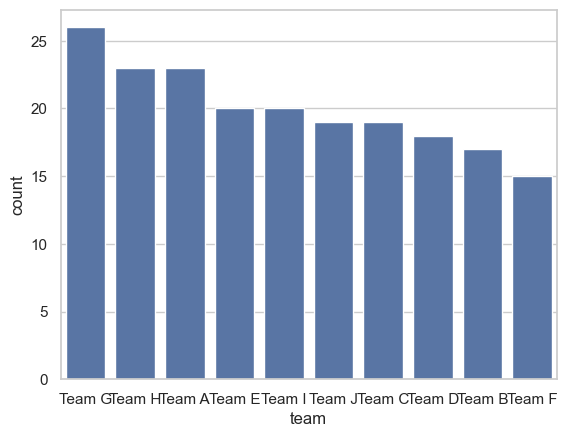

In [4]:
sns.countplot(data=df, x="team", order=df['team'].value_counts().index)


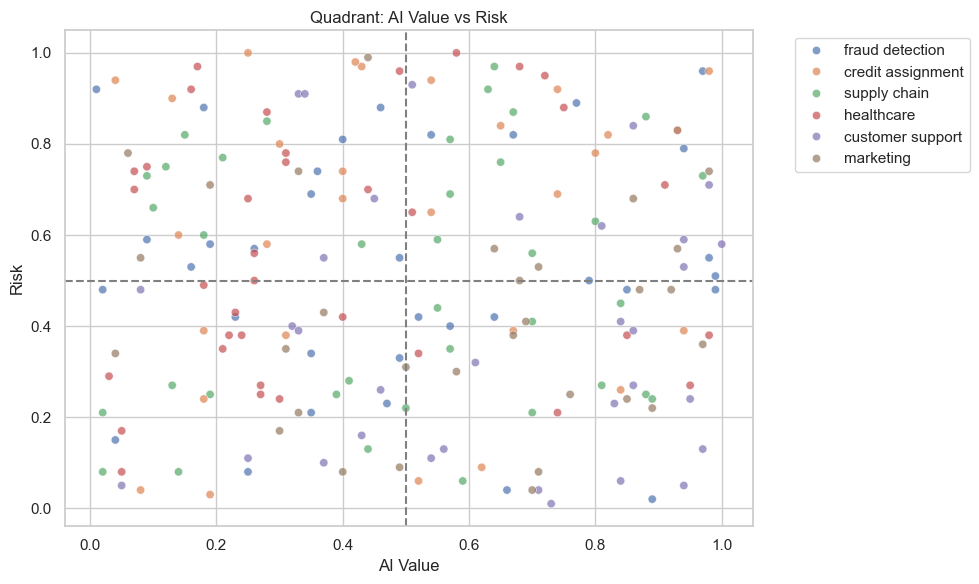

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="ai_value", y="risk", hue="job_type", alpha=0.7)

plt.axvline(0.5, color='grey', linestyle='--')
plt.axhline(0.5, color='grey', linestyle='--')

plt.title("Quadrant: AI Value vs Risk")
plt.xlabel("AI Value")
plt.ylabel("Risk")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


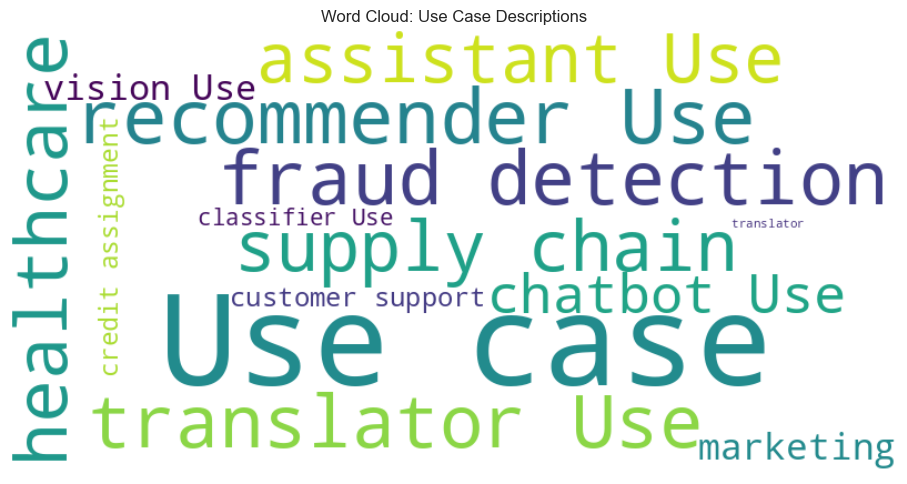

c:\Users\Pierre\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
ai_types = ['chatbot', 'translator', 'assistant', 'recommender', 'vision', 'classifier']
job_types = ['fraud detection', 'credit assignment', 'customer support', 'marketing', 'healthcare', 'supply chain']
teams = [f'Team {chr(i)}' for i in range(65, 75)]  # Team A to Team J

num_samples = 200
df = pd.DataFrame({
    "id": range(1, num_samples + 1),
    "team": np.random.choice(teams, num_samples),
    "description": [f"Use case {i} for {np.random.choice(job_types)} with {np.random.choice(ai_types)}" for i in range(1, num_samples + 1)],
    "ai_value": np.round(np.random.uniform(0, 1, num_samples), 2),
    "risk": np.round(np.random.uniform(0, 1, num_samples), 2),
    "ai_type": np.random.choice(ai_types, num_samples),
    "job_type": np.random.choice(job_types, num_samples),
})

# 1. Interactive Scatter Plot: AI Value vs Risk
fig1 = px.scatter(df, x='ai_value', y='risk', color='ai_type', hover_data=['team', 'job_type', 'description'],
                  title="AI Value vs Risk by AI Type")
fig1.show()

# 2. Bar Chart: Use Cases per AI Type
fig2 = px.bar(df['ai_type'].value_counts().reset_index(), x='index', y='ai_type',
              labels={'index': 'AI Type', 'ai_type': 'Count'},
              title="Number of Use Cases per AI Type")
fig2.show()

# 3. Box Plot: Risk Distribution per AI Type
fig3 = px.box(df, x='ai_type', y='risk', points="all", color='ai_type', title="Risk Distribution per AI Type")
fig3.show()

# 4. Heatmap: AI Type vs Job Type
heatmap_data = pd.crosstab(df['ai_type'], df['job_type'])
fig4 = px.imshow(heatmap_data, text_auto=True, aspect="auto", 
                 title="Heatmap of AI Type vs Job Type")
fig4.show()

# 5. Word Cloud from Descriptions (not interactive, optional)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['description']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Use Case Descriptions")
plt.tight_layout()
plt.show()

# 6. Parallel Coordinates
fig6 = px.parallel_coordinates(df, color='ai_value',
                               dimensions=['ai_value', 'risk'],
                               color_continuous_scale=px.colors.sequential.Viridis,
                               title="Parallel Coordinates: AI Value & Risk")
fig6.show()

# 7. Quadrant Plot: AI Value vs Risk with Thresholds
fig7 = px.scatter(df, x='ai_value', y='risk', color='job_type',
                  hover_data=['team', 'description'], title="Quadrant: AI Value vs Risk")
fig7.add_vline(x=0.5, line_dash="dash", line_color="gray")
fig7.add_hline(y=0.5, line_dash="dash", line_color="gray")
fig7.show()

# 8. Bubble Chart: Avg Risk & Value per Team
grouped = df.groupby('team').agg({'ai_value': 'mean', 'risk': 'mean', 'id': 'count'}).reset_index()
fig8 = px.scatter(grouped, x='ai_value', y='risk', size='id', color='team',
                  hover_name='team', size_max=40, title="Team Bubble Chart: Avg AI Value & Risk")
fig8.show()


In [ ]:
fig9b = px.treemap(df, path=['team', 'ai_type', 'job_type'], 
                   title='Treemap: Team > AI Type > Job Type')
fig9b.show()

In [12]:
team_profiles = df.groupby(['team', 'ai_type']).agg({'ai_value': 'mean'}).reset_index()
teams_to_plot = team_profiles['team'].unique()

fig10 = go.Figure()

for team in teams_to_plot:
    subset = team_profiles[team_profiles['team'] == team]
    fig10.add_trace(go.Scatterpolar(
        r=subset['ai_value'],
        theta=subset['ai_type'],
        fill='toself',
        name=team
    ))

fig10.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="Radar Chart: Average AI Value per AI Type by Team",
    showlegend=True
)
fig10.show()


In [13]:
corr = df[['ai_value', 'risk']].corr()
fig12 = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu', title="Feature Correlation Heatmap")
fig12.show()
